# Exploratory Data Analysis

In [1]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')
sys.path.append('../scripts')
from data_loader import *
from eda import *

## Load Datasets

In [2]:
# path to the CSV file
filename1 = 'brent_oil_price.parquet'
filename2 = 'gdp_rate.parquet'

path1 = os.path.join('..', 'data/processed', filename1)
path2 = os.path.join('..', 'data/processed', filename2)

# Load dataset
brent_oil_df = load_data(path1)
gdp_data = load_data(path2)

## Brent Oil Time Series Plot

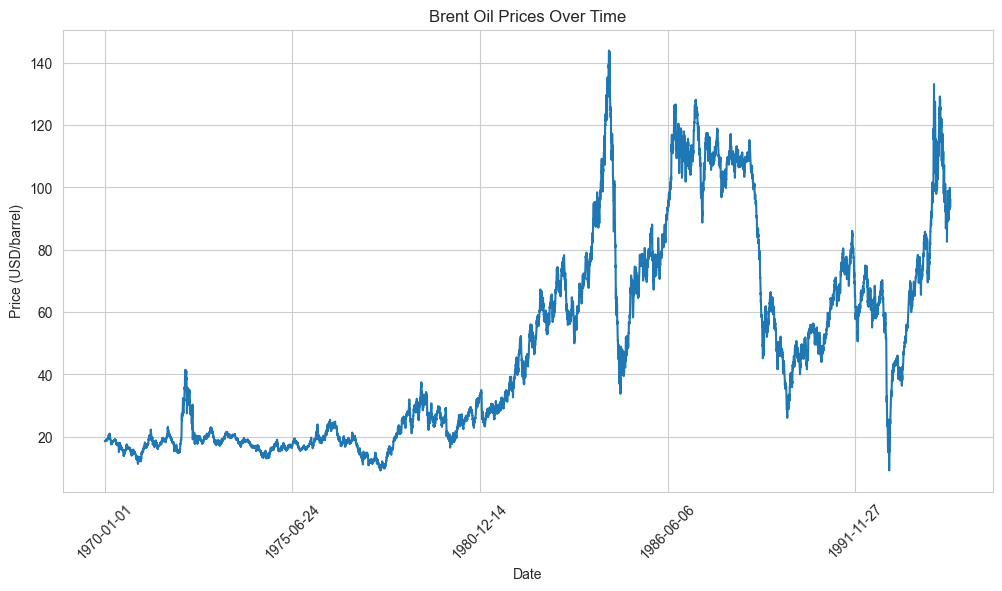

In [12]:
plot_brent_oil_prices(brent_oil_df)

# Summary statistics

In [13]:
summary_stats = brent_oil_df['Price'].describe()
display(summary_stats)

count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64

## Distribution of Brent oil prices 

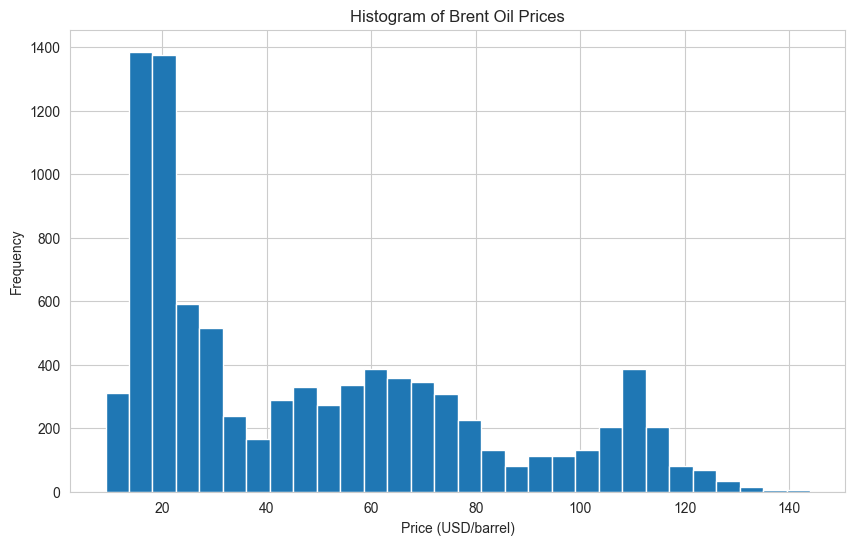

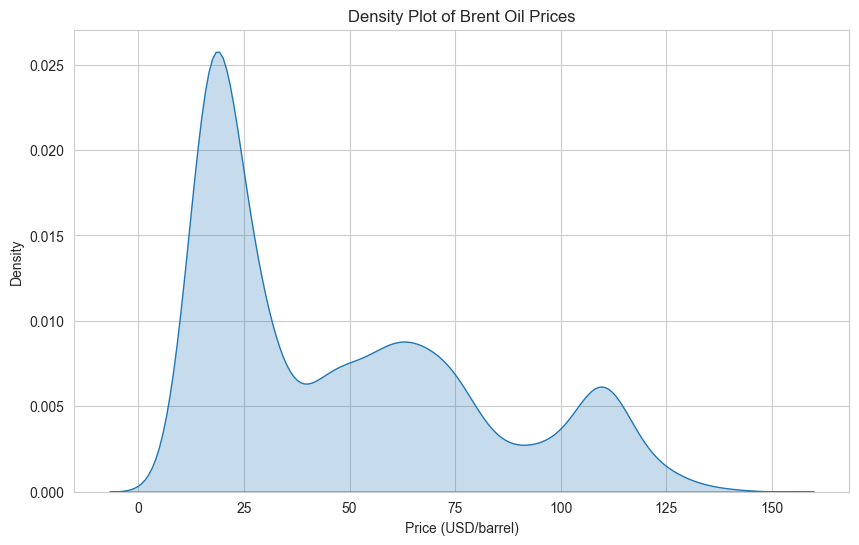

In [14]:
analyze_brent_oil_price_distribution(brent_oil_df)

##  Stationarity Analysis

In [15]:
# Check the stationarity of the Brent oil price time series
diff_level = check_stationarity(brent_oil_df)
diff_level

The Brent oil price time series is non-stationary.
The Brent oil price time series becomes stationary after 1 level(s) of differencing.


1

## Visualize the ACF and PACF plots

<Figure size 1000x600 with 0 Axes>

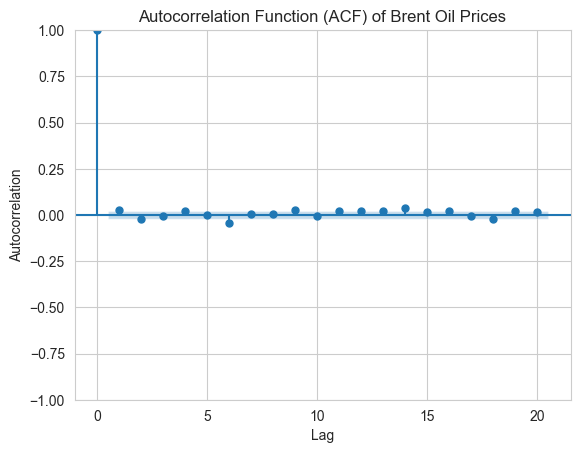

<Figure size 1000x600 with 0 Axes>

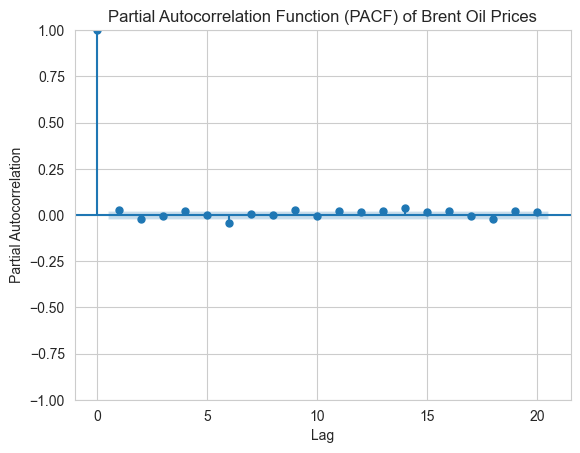

In [16]:
visualize_acf_pacf(brent_oil_df, diff_level)

## Exploring Other Potential Factors Influencing Oil Prices

### Correlation between GDP growth rates of major economies and oil prices

In [17]:
gdp_data

,Country,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Brazil,3.6,0.3,3.2,-4.2,1.0,-0.5,4.7,5.3,4.4,...,3.0,0.5,-3.5,-3.3,1.3,1.8,1.2,-3.3,4.8,3.0
1,Canada,4.1,4.4,2.3,0.2,-2.1,0.9,2.7,4.5,2.7,...,2.3,2.9,0.6,1.0,3.0,2.7,1.9,-5.0,5.3,3.8
2,China,11.7,11.2,4.2,3.9,9.0,14.3,13.9,13.0,11.0,...,7.8,7.4,7.0,6.9,6.9,6.8,6.0,2.2,8.4,3.0
3,France,2.6,4.7,4.3,2.9,1.0,1.6,-0.6,2.4,2.1,...,0.6,1.0,1.1,1.1,2.3,1.9,1.8,-7.5,6.3,2.5
4,Germany,1.5,3.7,3.9,5.7,5.0,1.9,-1.0,2.4,1.5,...,0.4,2.2,1.5,2.2,2.7,1.0,1.1,-3.8,3.2,1.8
5,Italy,3.2,4.2,3.4,2.1,1.4,0.8,-0.9,2.2,2.9,...,-1.8,0.0,0.8,1.3,1.7,0.9,0.5,-9.0,8.3,4.0
6,Japan,4.6,6.7,4.9,4.8,3.5,0.9,-0.5,1.1,2.6,...,2.0,0.3,1.6,0.8,1.7,0.6,-0.4,-4.1,2.6,1.0
7,United Kingdom,5.4,5.4,2.4,0.6,-1.4,0.2,2.3,3.4,2.4,...,1.8,3.2,2.2,1.9,2.7,1.4,1.6,-10.4,8.7,4.3
8,United States,3.5,4.2,3.7,1.9,-0.1,3.5,2.8,4.0,2.7,...,2.1,2.5,2.9,1.8,2.5,3.0,2.5,-2.2,5.8,1.9


## Transpose the data

In [18]:
gdp_data = gdp_data.set_index('Country').transpose()

# Convert the index to datetime format
gdp_data.index = pd.to_datetime(gdp_data.index + '-12-31', format='%Y-%m-%d')
gdp_data = gdp_data.rename_axis('Date')

In [19]:
gdp_data.head()

Country,Brazil,Canada,China,France,Germany,Italy,Japan,United Kingdom,United States
Date,,,,,,,,,
1987-12-31,3.6,4.1,11.7,2.6,1.5,3.2,4.6,5.4,3.5
1988-12-31,0.3,4.4,11.2,4.7,3.7,4.2,6.7,5.4,4.2
1989-12-31,3.2,2.3,4.2,4.3,3.9,3.4,4.9,2.4,3.7
1990-12-31,-4.2,0.2,3.9,2.9,5.7,2.1,4.8,0.6,1.9
1991-12-31,1.0,-2.1,9.0,1.0,5.0,1.4,3.5,-1.4,-0.1


In [20]:
brent_oil_df['Date'] = pd.to_datetime(brent_oil_df['Date'])

brent_oil_df.set_index('Date', inplace=True)

# Resample Brent oil price data to yearly frequency
df_yearly = brent_oil_df.resample('Y').mean()

df_yearly.head()

,Price
Date,
1987-12-31,18.525813
1988-12-31,14.905412
1989-12-31,18.228228
1990-12-31,23.761445
1991-12-31,20.041128


## Merge the two datasets on the date

In [21]:
merged_data = pd.merge(df_yearly, gdp_data, left_index=True, right_index=True, how='inner')
merged_data.head()

,Price,Brazil,Canada,China,France,Germany,Italy,Japan,United Kingdom,United States
Date,,,,,,,,,,
1987-12-31,18.525813,3.6,4.1,11.7,2.6,1.5,3.2,4.6,5.4,3.5
1988-12-31,14.905412,0.3,4.4,11.2,4.7,3.7,4.2,6.7,5.4,4.2
1989-12-31,18.228228,3.2,2.3,4.2,4.3,3.9,3.4,4.9,2.4,3.7
1990-12-31,23.761445,-4.2,0.2,3.9,2.9,5.7,2.1,4.8,0.6,1.9
1991-12-31,20.041128,1.0,-2.1,9.0,1.0,5.0,1.4,3.5,-1.4,-0.1


In [22]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'processed')
filename = 'merged_oil_gdp_rate.parquet'

output_path = save_data(merged_data, output_folder, filename)

Dataset saved to ..\data\processed\merged_oil_gdp_rate.parquet


In [23]:
# path to the CSV file
filename1 = 'merged_oil_gdp_rate.parquet'


path1 = os.path.join('..', 'data/processed', filename1)
# Load dataset
merged_data = load_data(path1)

In [24]:
merged_data.head()

,Price,Brazil,Canada,China,France,Germany,Italy,Japan,United Kingdom,United States
Date,,,,,,,,,,
1987-12-31,18.525813,3.6,4.1,11.7,2.6,1.5,3.2,4.6,5.4,3.5
1988-12-31,14.905412,0.3,4.4,11.2,4.7,3.7,4.2,6.7,5.4,4.2
1989-12-31,18.228228,3.2,2.3,4.2,4.3,3.9,3.4,4.9,2.4,3.7
1990-12-31,23.761445,-4.2,0.2,3.9,2.9,5.7,2.1,4.8,0.6,1.9
1991-12-31,20.041128,1.0,-2.1,9.0,1.0,5.0,1.4,3.5,-1.4,-0.1


                   Price    Brazil    Canada     China    France   Germany  \
Price           1.000000  0.191112 -0.041023 -0.195882 -0.146652 -0.047986   
Brazil          0.191112  1.000000  0.534353  0.519732  0.340041  0.163162   
Canada         -0.041023  0.534353  1.000000  0.277877  0.807043  0.447600   
China          -0.195882  0.519732  0.277877  1.000000  0.175919  0.047597   
France         -0.146652  0.340041  0.807043  0.175919  1.000000  0.743587   
Germany        -0.047986  0.163162  0.447600  0.047597  0.743587  1.000000   
Italy          -0.214073  0.336034  0.745425  0.165416  0.940203  0.730404   
Japan          -0.218081  0.196225  0.438525  0.125893  0.667687  0.740261   
United Kingdom -0.069911  0.415623  0.901771  0.279230  0.880076  0.527839   
United States  -0.274190  0.300674  0.851988  0.258846  0.801546  0.489638   

                   Italy     Japan  United Kingdom  United States  
Price          -0.214073 -0.218081       -0.069911      -0.274190  
Brazi

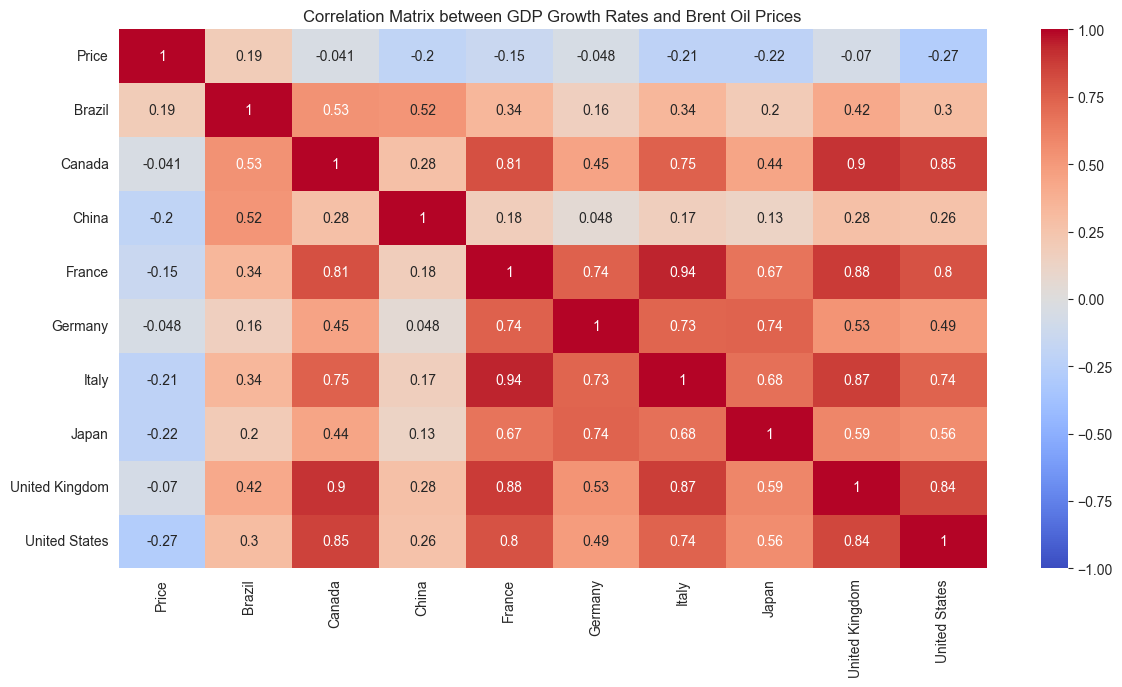

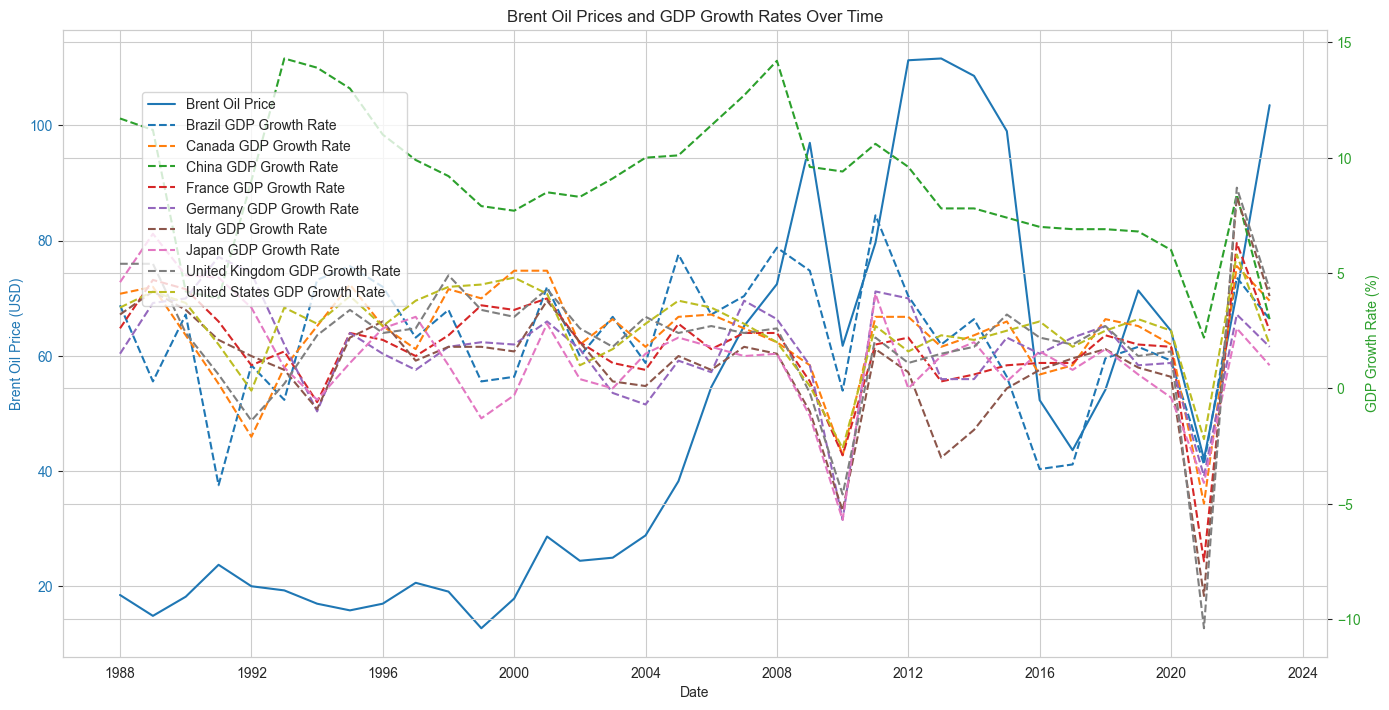

In [25]:
analyze_gdp_and_oil_prices(merged_data)

# Relationship between Unemployment rates & Oil consumption patterns

In [2]:
# path to the CSV file
filename3 = 'world_oil_consumption.csv'

filename4 = 'world_umemployment_rate.csv'
path1 = os.path.join('..', 'data/raw', filename3)
path2 = os.path.join('..', 'data/raw', filename4)

# Load dataset
oil_consumption_df = load_data(path1)
unemployment_rate_df = load_data(path2)

In [3]:
oil_consumption_df

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,World,66930.59273,67185.41879,66989.72191,68376.3034,69797.4446,71870.46613,73083.80539,73902.69465,75523.216,...,92159.7727,93695.77471,95474.73849,96960.72652,99064.62705,100064.7229,100848.8289,91692.33623,97558.73209,99844.6326


In [4]:
unemployment_rate_df

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,World,4.99634,5.149939,5.417837,5.667754,5.820786,5.908678,5.954036,6.125231,6.265528,...,6.167134,6.016229,6.048849,6.010331,5.916141,5.756398,5.58298,6.585288,6.033761,5.264616


## Transposing the Datasets

In [5]:
oil_consumption_df = oil_consumption_df.set_index('Country').transpose()

# Convert the index to datetime format
oil_consumption_df.index = pd.to_datetime(oil_consumption_df.index + '-12-31', format='%Y-%m-%d')
oil_consumption_df = oil_consumption_df.rename_axis('Date')

In [6]:
oil_consumption_df.head()

Country,World
Date,
1991-12-31,66930.59273
1992-12-31,67185.41879
1993-12-31,66989.72191
1994-12-31,68376.30340
1995-12-31,69797.44460


In [7]:
unemployment_rate_df = unemployment_rate_df.set_index('Country').transpose()

# Convert the index to datetime format
unemployment_rate_df.index = pd.to_datetime(unemployment_rate_df.index + '-12-31', format='%Y-%m-%d')
unemployment_rate_df = unemployment_rate_df.rename_axis('Date')

In [8]:
unemployment_rate_df.head()

Country,World
Date,
1991-12-31,4.996340
1992-12-31,5.149939
1993-12-31,5.417837
1994-12-31,5.667754
1995-12-31,5.820786


## Merging World Oil Consumption and World Unemploymnet rate Datasets

In [9]:
merged_oil_unemp_data = pd.merge(unemployment_rate_df, oil_consumption_df, left_index=True, right_index=True, how='inner')

In [10]:
merged_oil_unemp_data.head()

Country,World_x,World_y
Date,,
1991-12-31,4.996340,66930.59273
1992-12-31,5.149939,67185.41879
1993-12-31,5.417837,66989.72191
1994-12-31,5.667754,68376.30340
1995-12-31,5.820786,69797.44460


 NOTE: World_x is World Unemployment Reate while	World_y is World oil Consumption

In [ ]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'processed')
filename = 'merged_oil_unemp_data.parquet'

output_path = save_data(merged_oil_unemp_data, output_folder, filename)

In [11]:
# path to the CSV file
filename1 = 'merged_oil_unemp_data.parquet'


path1 = os.path.join('..', 'data/processed', filename1)
# Load dataset
merged_oil_unemp_data = load_data(path1)

## Analyzing and visualizes the relationship between unemployment rates and oil consumption patterns

Correlation Matrix:
Country   World_x   World_y
Country                    
World_x  1.000000  0.212461
World_y  0.212461  1.000000


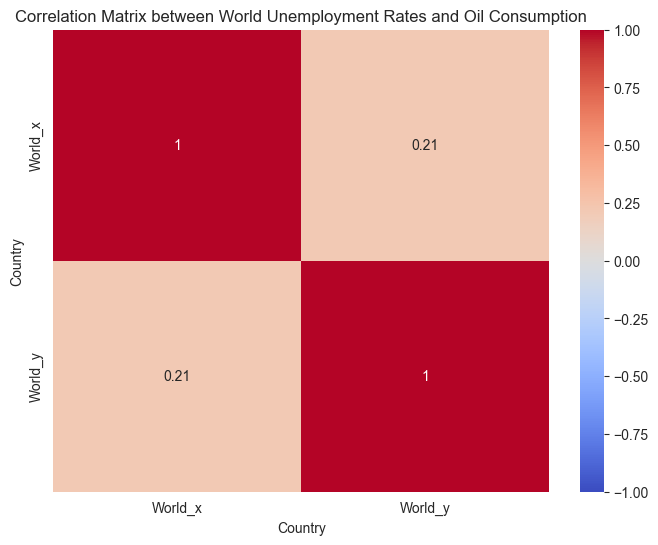

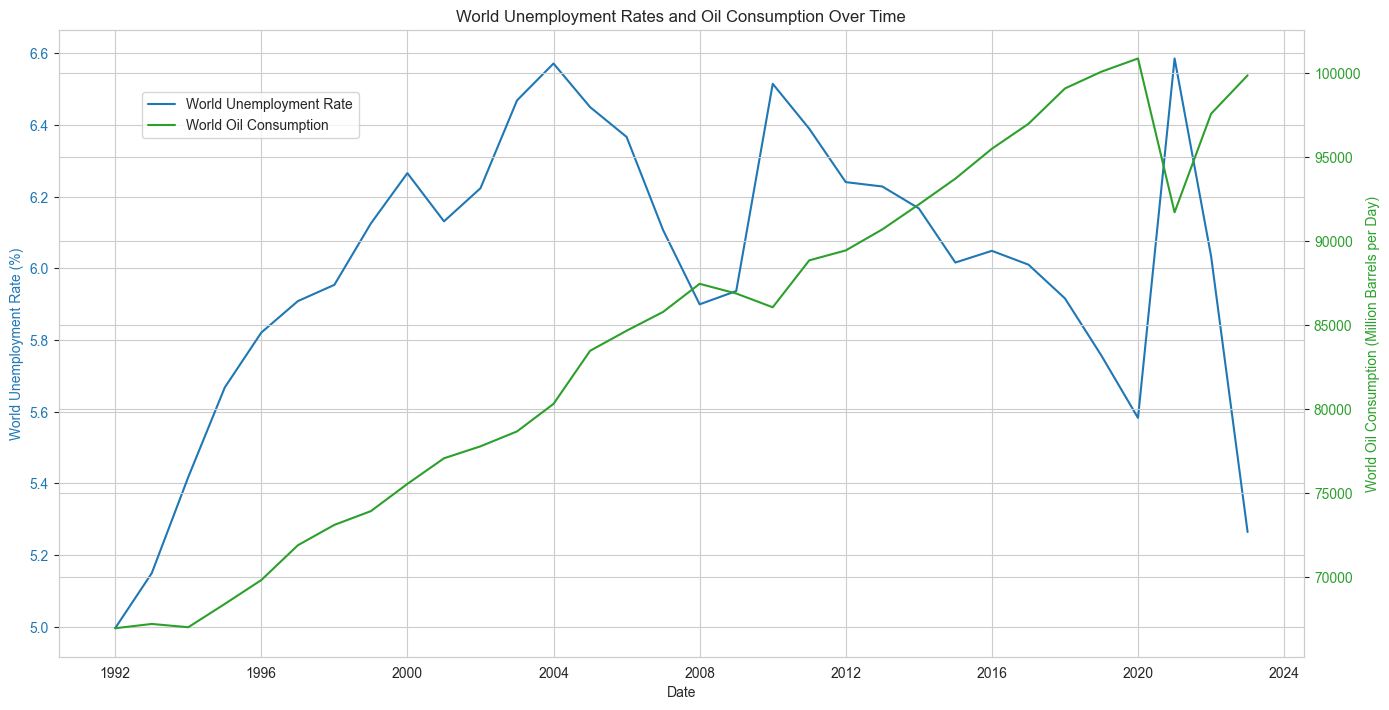

In [12]:
analyze_unemployment_and_oil_consumption(merged_oil_unemp_data)

#### NOTE: World_x is World Unemployment Rates while World_y is World oil Consumption

## Filtering the data points after 2012 and analyzing the correlation

In [16]:
filtered_df = merged_oil_unemp_data[merged_oil_unemp_data.index > '2010-12-31']

Correlation Matrix:
Country   World_x   World_y
Country                    
World_x  1.000000 -0.811527
World_y -0.811527  1.000000


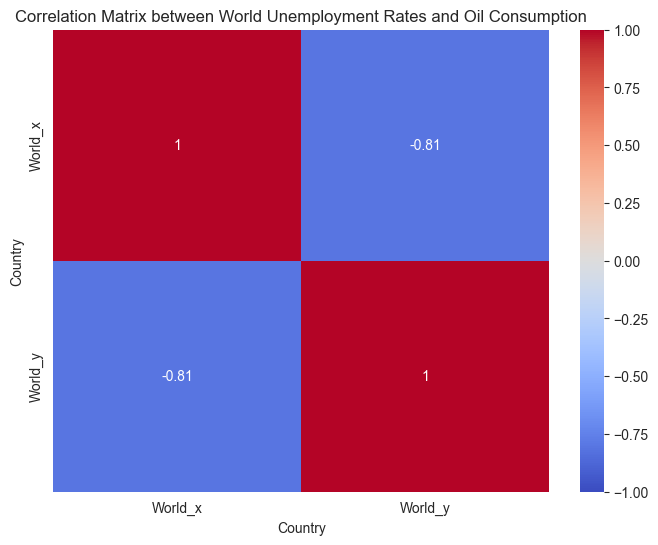

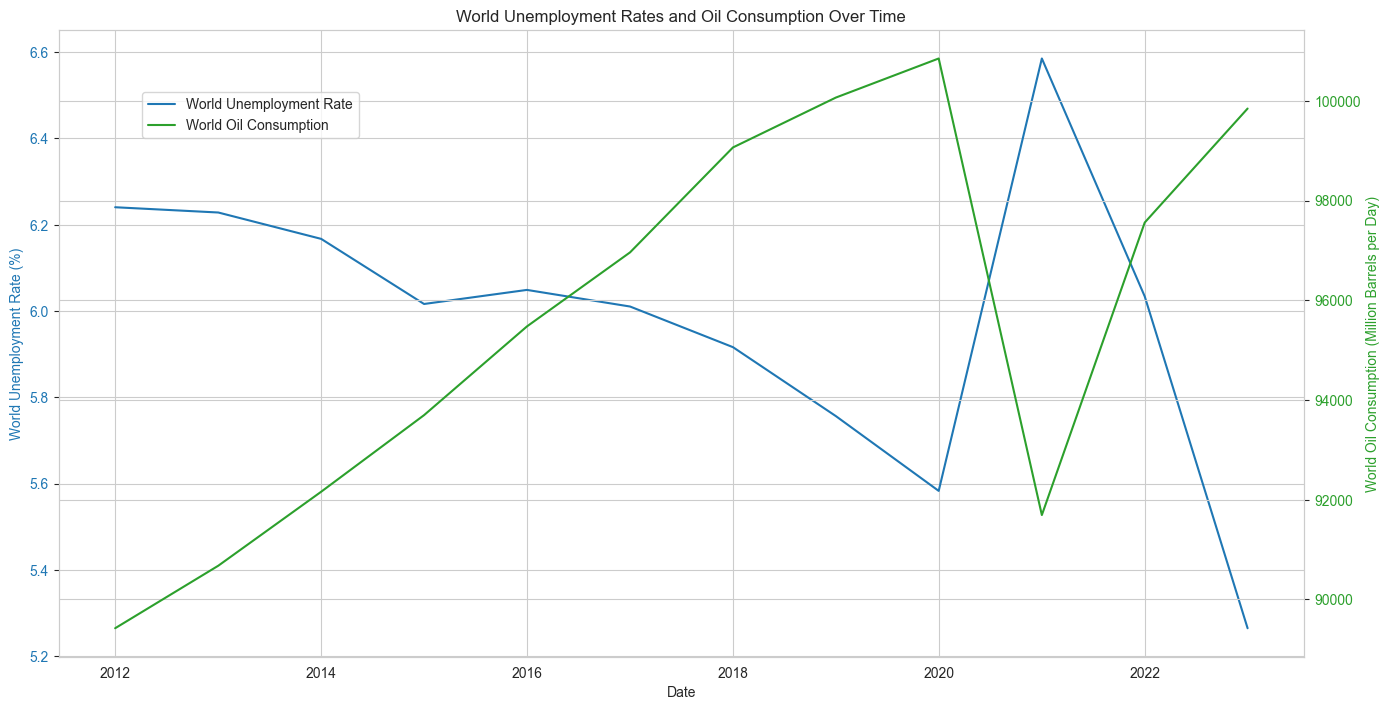

In [17]:
analyze_unemployment_and_oil_consumption(filtered_df)

# Analizing the Effect of currency fluctuations (the USD) , on oil prices.

In [29]:
# path to the CSV file
filename5 = 'usd_ex_rate_df.parquet'
path5 = os.path.join('..', 'data/processed', filename5)

# Load dataset
usd_rate_df = load_data(path5)

In [27]:
brent_oil_df.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [24]:
brent_oil_df['Date'] = pd.to_datetime(brent_oil_df['Date'])

brent_oil_df.set_index('Date', inplace=True)

# Resample Brent oil price data to yearly frequency
df_yearly = brent_oil_df.resample('Y').mean()

df_yearly.head()

,Price
Date,
1987-12-31,18.525813
1988-12-31,14.905412
1989-12-31,18.228228
1990-12-31,23.761445
1991-12-31,20.041128


In [30]:
usd_rate_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1987-01-02,103.400002,103.639999,103.339996,103.610001,103.610001,0.0
2,1987-01-05,103.809998,104.349998,103.430000,104.139999,104.139999,0.0
3,1987-01-06,103.779999,103.849998,103.519997,103.699997,103.699997,0.0
4,1987-01-07,104.089996,104.269997,103.959999,104.080002,104.080002,0.0
5,1987-01-08,104.180000,104.230003,103.529999,103.559998,103.559998,0.0


In [31]:
usd_rate_df['Date'] = pd.to_datetime(usd_rate_df['Date'])

usd_rate_df.set_index('Date', inplace=True)

# Resample Brent oil price data to yearly frequency
df_yearly_usd = usd_rate_df.resample('Y').mean()

df_yearly_usd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1987-12-31,96.828038,97.067885,96.537538,96.777423,96.777423,0.0
1988-12-31,92.692874,92.910000,92.454138,92.673640,92.673640,0.0
1989-12-31,98.491423,98.768000,98.167769,98.464385,98.464385,0.0
1990-12-31,88.987854,89.200766,88.722069,88.938008,88.938008,0.0
1991-12-31,89.722146,90.015785,89.387778,89.688008,89.688008,0.0


## Merging the datasets

In [32]:
merged_usd_oil_data = pd.merge(df_yearly, df_yearly_usd, left_index=True, right_index=True, how='inner')

In [33]:
merged_usd_oil_data.head()

,Price,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1987-12-31,18.525813,96.828038,97.067885,96.537538,96.777423,96.777423,0.0
1988-12-31,14.905412,92.692874,92.910000,92.454138,92.673640,92.673640,0.0
1989-12-31,18.228228,98.491423,98.768000,98.167769,98.464385,98.464385,0.0
1990-12-31,23.761445,88.987854,89.200766,88.722069,88.938008,88.938008,0.0
1991-12-31,20.041128,89.722146,90.015785,89.387778,89.688008,89.688008,0.0


In [34]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'processed')
filename = 'merged_usd_oil_data.parquet'

output_path = save_data(merged_usd_oil_data, output_folder, filename)

Dataset saved to ..\data\processed\merged_usd_oil_data.parquet


In [3]:
# path to the CSV file
filename1 = 'merged_usd_oil_data.parquet'


path1 = os.path.join('..', 'data/processed', filename1)
# Load dataset
merged_usd_oil_data= load_data(path1)


Correlation Matrix:
          Close     Price
Close  1.000000 -0.498962
Price -0.498962  1.000000


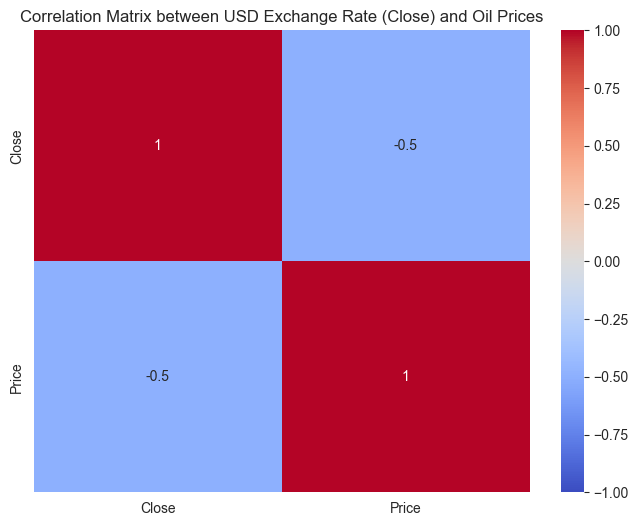

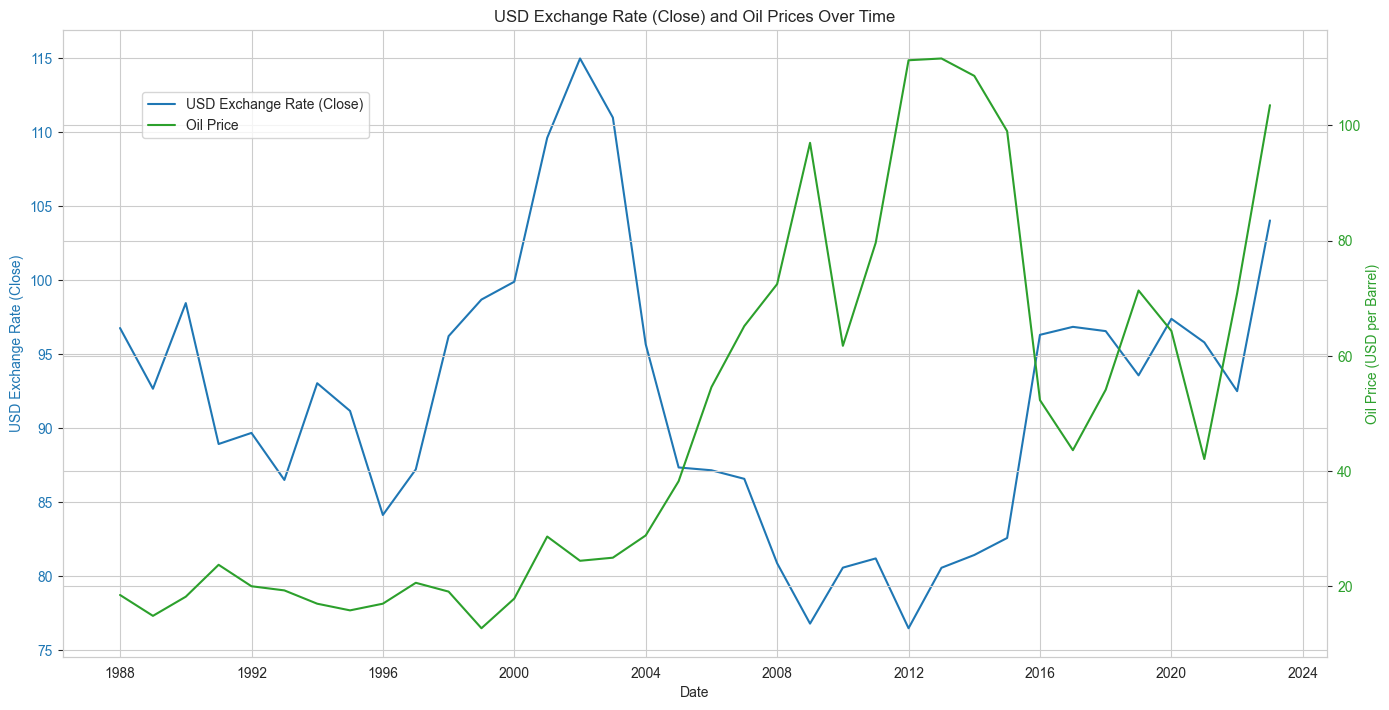

In [5]:
analyze_exchange_rates_and_oil_prices(merged_usd_oil_data)